In [203]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# подключаем библиотеку работы с датой
from dateutil.parser import parse

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [204]:
# Будем работать с БД фильмов
df = pd.read_csv('tmdb_5000_movies.csv')
print(df.shape)

(4803, 20)


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [206]:
print(df.shape)

(4803, 20)


In [242]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [208]:
# Оставим только нужные колонки
useful_cols = ['id','budget', 'original_language', 'original_title', 'popularity', 
               'release_date', 'revenue', 'runtime',
               'status', 'vote_average', 'vote_count'
              ]
df1 = df[useful_cols]
df1 = df1.dropna()

In [209]:
# отпарсим колонку с датой выхода, оставим год и месяц
def onlyDate( row , type ):
    """
    Функция возвращает год из даты формата YYYY-MM-DD
    """
    
    if not pd.isnull( row['release_date'] ):
        dateObject = parse(row['release_date'])
    
        if type == 'year':
            return int64(dateObject.strftime('%Y'))
        
        if type == 'month':
            return int64(dateObject.strftime('%m'))
    
    # или год или месяц равны нулю
    return 0



In [210]:
# делаем колонку с годом выхода
df1['release_year'] = df1.apply( onlyDate, axis = 1, type = 'year' )

In [211]:
# Делаем колонку с месяцом выхода
df1['release_month'] = df1.apply( onlyDate, axis = 1, type = 'month' )

In [212]:
df1 = df1[(df1['release_year'] < 2017)] # отрезаем 2017, данных там мало

In [213]:
# проверяем
df1.head(10)

,id,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,release_year,release_month
0,19995,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800,2009,12
1,285,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Released,6.9,4500,2007,5
2,206647,245000000,en,Spectre,107.376788,2015-10-26,880674609,148.0,Released,6.3,4466,2015,10
3,49026,250000000,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,Released,7.6,9106,2012,7
4,49529,260000000,en,John Carter,43.926995,2012-03-07,284139100,132.0,Released,6.1,2124,2012,3
5,559,258000000,en,Spider-Man 3,115.699814,2007-05-01,890871626,139.0,Released,5.9,3576,2007,5
6,38757,260000000,en,Tangled,48.681969,2010-11-24,591794936,100.0,Released,7.4,3330,2010,11
7,99861,280000000,en,Avengers: Age of Ultron,134.279229,2015-04-22,1405403694,141.0,Released,7.3,6767,2015,4
8,767,250000000,en,Harry Potter and the Half-Blood Prince,98.885637,2009-07-07,933959197,153.0,Released,7.4,5293,2009,7
9,209112,250000000,en,Batman v Superman: Dawn of Justice,155.790452,2016-03-23,873260194,151.0,Released,5.7,7004,2016,3


In [214]:
# построим первый график - выясним распределение количества релизов фильма с 2000 года
# выбран heattable, дабы взглядом охватиьт все операционное пространство

heatTable = df1[(df1['release_year'] >= 2000) & (df1['status'] == 'Released')].pivot_table(
                        index='release_year', 
                        columns='release_month', 
                        values='id', 
                        aggfunc='count').fillna(0).applymap(float)

heatTable

release_month,1,2,3,4,5,6,7,8,9,10,11,12
release_year,,,,,,,,,,,,
2000,8.0,13.0,17.0,12.0,19.0,10.0,11.0,12.0,22.0,17.0,9.0,16.0
2001,16.0,8.0,16.0,15.0,6.0,13.0,18.0,19.0,19.0,17.0,16.0,20.0
2002,27.0,16.0,14.0,10.0,19.0,15.0,12.0,16.0,19.0,21.0,13.0,21.0
2003,18.0,10.0,11.0,17.0,12.0,13.0,12.0,19.0,19.0,14.0,12.0,12.0
2004,18.0,16.0,11.0,23.0,16.0,13.0,16.0,13.0,34.0,14.0,14.0,16.0
2005,25.0,15.0,16.0,12.0,14.0,15.0,13.0,21.0,35.0,21.0,14.0,15.0
2006,23.0,14.0,24.0,13.0,17.0,17.0,11.0,17.0,36.0,25.0,9.0,29.0
2007,18.0,16.0,14.0,15.0,15.0,16.0,13.0,19.0,25.0,15.0,13.0,16.0
2008,23.0,24.0,14.0,14.0,10.0,12.0,20.0,18.0,28.0,30.0,12.0,22.0


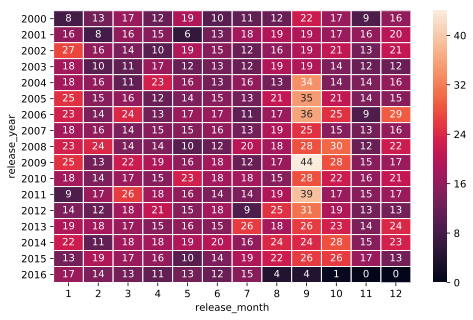

In [215]:
sns.heatmap(heatTable, annot=True, fmt=".0f", linewidths=1);

In [216]:
# интересно узнать, что больше всего фильмов (с 2000 года) было выпущено в сентябре 2009 года

# посмотрим сумму по месяцам, может быть, мы найдем главные реализационные месяцы c 2000 года

In [217]:
mainMonths = df1[(df1['release_year'] >= 2000) & (df1['status'] == 'Released')]
mainMonths = mainMonths[['id'] + ['release_month']].groupby('release_month').count()
mainMonths.head(12)

,id
release_month,
1,313
2,250
3,285
4,264
5,256
6,253
7,255
8,298
9,459


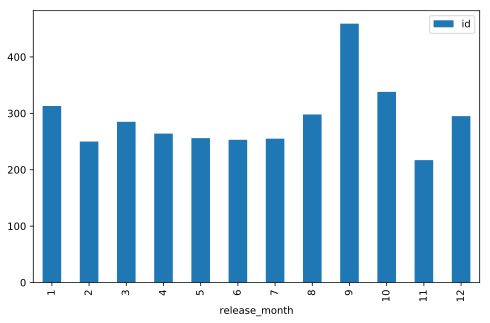

In [218]:
mainMonths.plot(kind='bar')

In [219]:
# Самым плодотворным месяцем остается сентябрь, на него приходится большее количетво премьер. 
# Данный график выбран чтобы было удобнее сравнивать.

In [222]:
# посмотрим на среднюю длительность фильмов с разбивкой по годам 
# так как мы берем все данные, то bar chart уже не подходит - будет слишком много столбцов, берем line chart
runtime = df1[['runtime'] + ['release_year']].groupby('release_year').mean()
runtime.head(12)

,runtime
release_year,
1916,197.0
1925,151.0
1927,153.0
1929,104.5
1930,127.0
1932,89.0
1933,77.5
1934,105.0
1935,101.0


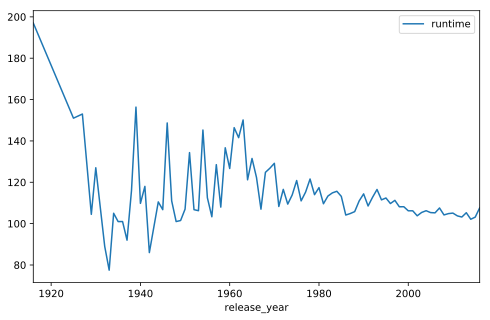

In [223]:
runtime.plot()

In [225]:
# Мы видим тенденцию к уменьшению экранного времени. 

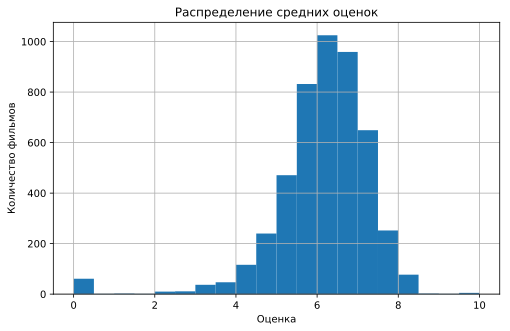

In [226]:
# распределение оценок по фильмам
# в данном случае у нас гистограмма, она удобнее
ax = df1.vote_average.hist(bins = 20)
ax.set_title('Распределение средних оценок')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество фильмов')

In [227]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


init_notebook_mode(connected=True)

In [230]:
# посмотрим корреляцию бюджетов фильмов и сборов
# здесь мы используем двойной line chart, потому что нет ничего проще и удобнее

global_budget = df1.groupby('release_year')[['budget']].sum()

global_budget.head(10)

,budget
release_year,
1916,385907
1925,245000
1927,92620000
1929,379000
1930,3950000
1932,4
1933,639000
1934,325000
1935,609000


In [231]:
global_revenue = df1.groupby('release_year')[['revenue']].sum()

global_revenue.head(10)

,revenue
release_year,
1916,8394751
1925,22000000
1927,650422
1929,4358000
1930,8000000
1932,25
1933,4481000
1934,4500000
1935,3202000


In [232]:
years_df = global_budget.join(global_revenue)
years_df.head()

,budget,revenue
release_year,,
1916,385907,8394751
1925,245000,22000000
1927,92620000,650422
1929,379000,4358000
1930,3950000,8000000


In [233]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.budget,
    name='budget'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.revenue,
    name='revenue'
)

data = [trace0, trace1]
layout = {'title': 'Суммарная статистика бюджетов и прибыли видеофильмов'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [234]:
# Посчитаем соотношение прибыли и бюджета для фильмов

In [235]:
def ratio( row ):
    """
    Функция возвращает год из даты формата YYYY-MM-DD
    """
    
    # проверяем, что значение возраста не равно NaN
    if (not pd.isnull( row['budget'] )) & (not pd.isnull(row['revenue'])):
        if row['budget'] > 0:
            return row['revenue'] / row['budget']
        
        return 1;
    
    # или 1:1
    return 1



In [236]:
# Делаем колонку соотношение разходов на фильм и доходов по ним
df1['ratio'] = df1.apply( ratio, axis = 1)

In [237]:
df1['ratio'] = df1.release_month.astype('float64')

In [238]:
df1.head()

,id,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,release_year,release_month,ratio
0,19995,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800,2009,12,12.0
1,285,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Released,6.9,4500,2007,5,5.0
2,206647,245000000,en,Spectre,107.376788,2015-10-26,880674609,148.0,Released,6.3,4466,2015,10,10.0
3,49026,250000000,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,Released,7.6,9106,2012,7,7.0
4,49529,260000000,en,John Carter,43.926995,2012-03-07,284139100,132.0,Released,6.1,2124,2012,3,3.0


In [239]:
ratio = df1[['ratio'] + ['release_year']].groupby('release_year').mean()
ratio.head(12)

,ratio
release_year,
1916,9.0
1925,11.0
1927,1.0
1929,1.5
1930,11.0
1932,12.0
1933,2.0
1934,2.0
1935,9.0


In [250]:
trace0 = go.Scatter(
    x=ratio.index,
    y=ratio.ratio,
    name='ratio',
    mode = 'lines+markers',
)
data = [trace0]
layout = {'title': 'Соотношение затрат и прибыли по годам'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [ ]:
# Начиная с 1983 года мы видим, что, в среднем, фильм окупается 6-7 раз.